# 前言

在进入股票市场进行投资时，需要先对股市的上证指数进行理性分析，在确认股市情况较为正常时再进行投资，并且根据上证指数来设计后续的交易策略。（如2008年金融危机，上证指数暴跌，其它各种股指也迅速下跌，在这种情况下不建议对股市进行投资）

# 库的引入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts
#画图时显示中文，使用微软雅黑字体，画图时显示负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
# %matplotlib inline

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


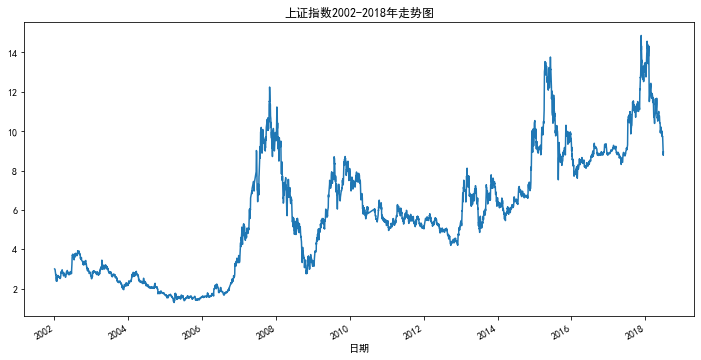

In [2]:
sh=ts.get_k_data(code='000001',start='2002-01-01',end='2018-07-01',
             ktype='D',autype='qfq')
sh.index=pd.to_datetime(sh.date)  #将数据列表中第0列‘date'设置为索引
#画出上证指数收盘价的走势
sh['close'].plot(figsize=(12,6))
plt.title('上证指数2002-2018年走势图')
plt.xlabel('日期')
plt.show()

从图中可以看出，2018年年初到7月1日，上证指数一直下滑，股市行情不太好，因此在后续策略的定制中应采取较为保守的策略。

# 股票指数收益-风险情况

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


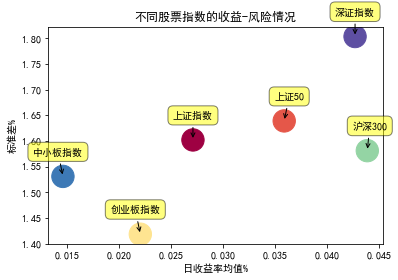

In [3]:
#构建一个计算股票收益率和标准差的函数
#默认起始时间为'2002-01-01'
def return_risk(stocks,startdate='2002-01-01'):
    close=pd.DataFrame()
    for stock in stocks.values():
        close[stock]=ts.get_k_data(stock,ktype='D',
     autype='qfq', start=startdate,end='2018-07-01')['close']
    tech_rets = close.pct_change()[1:]
    rets = tech_rets.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

#画图函数
def plot_return_risk(stocks):
    ret,vol=return_risk(stocks)
    color=np.array([ 0.18, 0.96, 0.75, 0.3, 0.9,0.5])
    plt.scatter(ret, vol, marker = 'o',
    c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")
    plt.ylabel("标准差%")
    for label,x,y in zip(stocks.keys(),ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",
             ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指数':'zxb','创业板指数':'cyb'}
plot_return_risk(stocks)
plt.title("不同股票指数的收益-风险情况")
plt.show()

从上图可以看到，6个主要的股票指数都位于45°直线的下方，即可认为日收益率带来的正面影响大于风险带来的负面影响，因此，我们可以放心的将资金投入股票市场。

# 股票收益-风险分析及股票选择

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


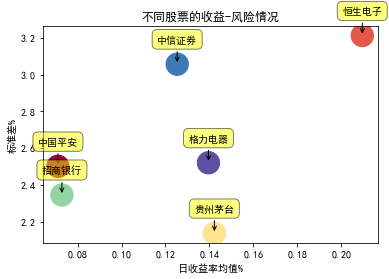

In [4]:
stocks1={'中国平安':'601318','格力电器':'000651',
        '招商银行':'600036','恒生电子':'600570',
        '中信证券':'600030','贵州茅台':'600519'}
# startdate='2018-01-01'
plot_return_risk(stocks1)
plt.title("不同股票的收益-风险情况")
plt.show()

选取了6支股票进行分析，从上图可以看到，恒生电子虽然收益率较高，但其风险也很大，而在股票市场，9%的亏损需要用10%的收入来弥补，因此同样水平下的风险和收益率时，应尽量避免风险。而贵州茅台风险最低，且收益也在6支股票中排在第2位，因此，我们将选择贵州茅台这支股票进行日后的投资对象，并针对此股票拟定交易策略。

# 贵州茅台股票的收益率分析

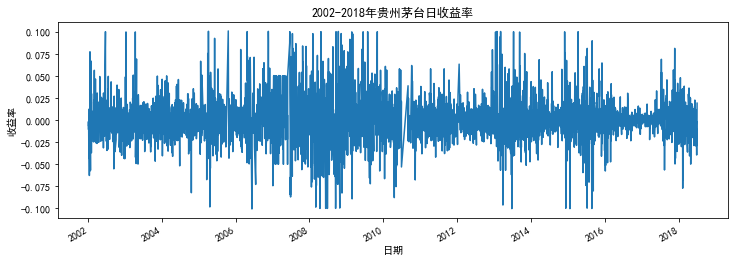

In [5]:
sh["日收益率"] = sh["close"].pct_change()
sh["日收益率"].loc['2002-01-01':].plot(figsize=(12,4))
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2002-2018年贵州茅台日收益率')
plt.show()

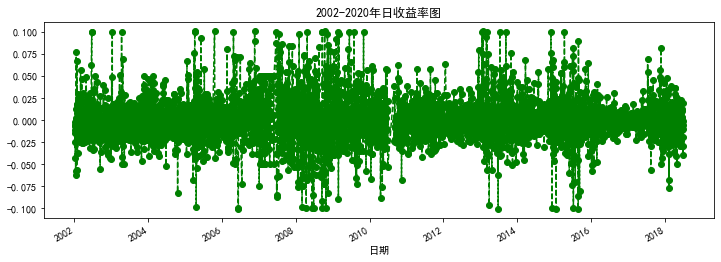

In [6]:
###这里我们改变一下线条的类型
#(linestyle)以及加一些标记(marker)
sh["日收益率"].loc['2002-01-01':].plot(figsize=
(12,4),linestyle="--",marker="o",color="g")
plt.title('2002-2020年日收益率图')
plt.xlabel('日期')
plt.show()

从贵州茅台2018年前来看，总收益大于总亏损，且近日的收益较好。虽然股票以往的收益不能代表未来的收益，但这从侧面证明了贵州茅台经营有方，是个值得信赖与投资的对象，
因此，我们确定了对贵州茅台股票进行策略的定制。